<a href="https://colab.research.google.com/github/algo74/MLCourse/blob/master/HW1/hw1_problem5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1. Problem 5. 

Extend the network from Problem 4 by adding new features.

*   Round the grey values of the images to 1 and 0 so you obtain black and white images. Add as an additional feature the number of white regions. For instance, a typical 0 has 2 white regions and 8 has 3. Use the following neighborhoods for pixels:

  pixel x,y (indicated by .) is connected to its neighbors (indicated by o):
  
```
   o
  o.o  
   o

  ooo
  o.o
  ooo
```
*   Consider the width.
*   Consider the height.
*   Come up with other features.




## Loading the image data

In [1]:
from keras.datasets import mnist
import numpy as np

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


## Preparing the image data

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

orig_tr_im = train_images.copy()
orig_tst_im = test_images.copy()

## Adding extra features

In [0]:
# returns new input set with added (and normalized) feature described by 'func'
def makeFeature(func, X):
  
  def arr_f(arg):
    return [func(arg)]
  
  new = np.apply_along_axis(arr_f, 1, X)
  new = new / max(np.max(new), 1)
  return new

### White region - common functions

In [0]:
threshold = 0.6

def paint (i, n, img, nbs):
  # do nothing if out of bound or already painted
  if not 0 <= i < n: return
  if img[i] : return
  # do paint
  img[i] = True
  for j in nbs:
    paint(i+j, n, img, nbs)
  
def countRegions(img, nbs):
  # do BW
  img = (img > threshold)
  n = len(img)
  regions = 0
  for i in range(n):
    if not img[i] :
      # found new region
      regions += 1
      # paint it
      paint(i, n, img, nbs)
  return regions

### White region A
```
   o
  o.o  
   o
```

In [5]:
def makeWhiteRegionsA(X):
  nbs = [-1, -28, 1, 28]
  def countWhiteRegionsA(img):
    return countRegions(img, nbs)
  
  return makeFeature(countWhiteRegionsA, X)
  

print(makeWhiteRegionsA(train_images[0:50])[:,0])
print (train_labels_original[0:50])

[0.25 0.5  0.25 0.25 0.5  0.5  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.5
 0.25 0.25 0.5  0.75 0.25 0.5  0.25 0.5  0.5  0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.5  0.75 0.25 0.5  0.5  0.25 0.5  0.5  0.25 0.5  0.25 0.75
 0.25 0.5  0.25 0.5  1.   0.25 0.5  0.5 ]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3]


### White region B
```
  ooo
  o.o
  ooo
```

In [6]:
def makeWhiteRegionsB(X):
  nbs = [-29, -1, -28, -27, 1, 29, 28, 27]
  def countWhiteRegionsB(img):
    return countRegions(img, nbs)
  
  return makeFeature(countWhiteRegionsB, X)
  

print(makeWhiteRegionsB(train_images[0:50])[:,0])
print (train_labels_original[0:50])

[0.33333333 0.66666667 0.33333333 0.33333333 0.66666667 0.66666667
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.66666667 0.33333333 0.33333333 0.66666667 1.
 0.33333333 0.33333333 0.33333333 0.66666667 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 1.         0.33333333 0.66666667 0.66666667 0.33333333
 0.66666667 0.66666667 0.33333333 0.66666667 0.33333333 0.66666667
 0.33333333 0.66666667 0.33333333 0.66666667 0.66666667 0.33333333
 0.33333333 0.66666667]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3]


### Width and height

In [7]:
def addW_n_H(X):
  def W_n_H(img):
    img = (img > threshold)
    img = img.reshape((28,28))
    # https://stackoverflow.com/questions/52931022/finding-height-and-width-of-an-image-using-numpy-and-pixel-locations
    col_ind=np.any(img, axis=0).nonzero()[0]
    row_ind=np.any(img, axis=1).nonzero()[0]
    try:
      w = col_ind[-1] - col_ind[0]
      h = row_ind[-1] - row_ind[0]
    except:
      w, h = 0, 0
    return [w, h]
    
  new = np.apply_along_axis(W_n_H, 1, X)
  new = new / max(np.max(new), 1)
  return np.c_[new, X]

print(addW_n_H(orig_tr_im[0:10])[:,0:2])
print (train_labels_original[0:10])

[[0.89473684 1.        ]
 [0.78947368 1.        ]
 [0.94736842 1.        ]
 [0.57894737 1.        ]
 [0.68421053 1.        ]
 [1.         0.78947368]
 [0.26315789 1.        ]
 [0.84210526 1.        ]
 [0.10526316 1.        ]
 [0.89473684 1.        ]]
[5 0 4 1 9 2 1 3 1 4]


### Adding all 4 new features

In [0]:
new_test_images = addW_n_H(test_images)

In [0]:
wra = makeWhiteRegionsA(test_images)

In [0]:
wrb = makeWhiteRegionsB(test_images)

In [0]:
test_images=np.c_[wra, wrb, new_test_images]

In [0]:
new_train_images = addW_n_H(train_images)

In [0]:
wra = makeWhiteRegionsA(train_images)

In [0]:
wrb = makeWhiteRegionsB(train_images)

In [0]:
train_images=np.c_[wra, wrb, new_train_images]

In [16]:
print(train_images.shape)
print(test_images.shape)

(60000, 788)
(10000, 788)


## Preparing the labels

We need to categorically encode the labels.

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

## The network architecture

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7890      
Total params: 7,890
Trainable params: 7,890
Non-trainable params: 0
_________________________________________________________________


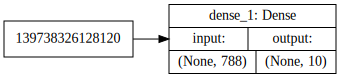

In [18]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(10, activation='softmax', input_shape=(train_images.shape[1],)))
network.summary()

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(network, show_shapes=True, rankdir='LR').create(prog='dot', format='svg'))


## The compilation step

In [0]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])



## The training step

In [20]:
epochs = 50
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 41us/step - loss: 1.3158 - acc: 0.6886 - val_loss: 0.8119 - val_acc: 0.8409
Epoch 2/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.7140 - acc: 0.8424 - val_loss: 0.6028 - val_acc: 0.8654
Epoch 3/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.5823 - acc: 0.8619 - val_loss: 0.5200 - val_acc: 0.8763
Epoch 4/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.5196 - acc: 0.8711 - val_loss: 0.4735 - val_acc: 0.8828
Epoch 5/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.4813 - acc: 0.8778 - val_loss: 0.4435 - val_acc: 0.8896
Epoch 6/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.4548 - acc: 0.8825 - val_loss: 0.4217 - val_acc: 0.8921
Epoch 7/50
60000/60000 [==============================] - 2s 29us/step - loss: 0

## Display the training/test loss/accuracy

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

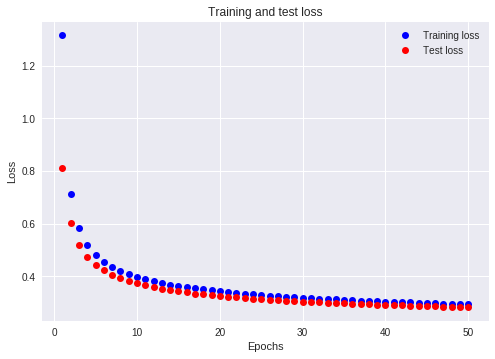

In [22]:
import matplotlib.pyplot as plt

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

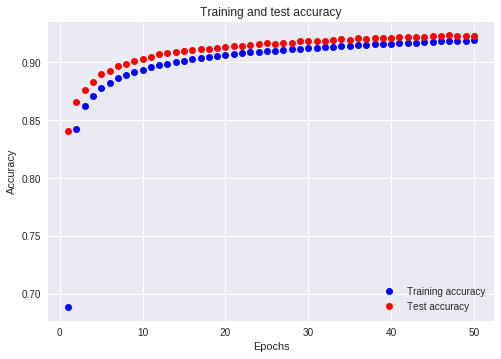

In [24]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Result of adding 4 extra features

Model with 4 extra features performed a little better than the original

## Analysis of misclassifications

We will use the training data as this is the correct approach

In [0]:
predicted_labels = np.argmax(network.predict(train_images), axis=1) 
predicted_labels = predicted_labels.astype('uint8')
wrong_indices = [i for i in range(60000) if predicted_labels[i] != train_labels_original[i]]

Generating a table of mismatch ('10' is the sum (times 0.3) of all mismatches in the row/column)

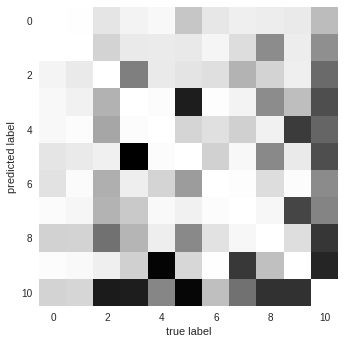

In [26]:
mm=np.zeros((11,11))

for i in wrong_indices:
  mm[predicted_labels[i], train_labels_original[i]]+=1
  mm[predicted_labels[i], 10]+=.3
  mm[10, train_labels_original[i]]+=.3
plt.imshow(mm)
plt.grid(None)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()


In [27]:
print(mm)

[[  0.    1.   40.   21.   12.   74.   38.   29.   31.   34.   84. ]
 [  0.    0.   61.   35.   33.   36.   19.   51.  118.   32.  115.5]
 [ 20.   34.    0.  129.   35.   42.   48.   90.   61.   29.  146.4]
 [ 13.   26.   91.    0.    6.  200.    3.   22.  118.   82.  168.3]
 [ 12.    6.   99.    6.    0.   59.   47.   64.   26.  180.  149.7]
 [ 41.   34.   27.  222.    6.    0.   63.   12.  121.   35.  168.3]
 [ 44.    7.   93.   30.   60.  106.    0.    3.   50.    5.  119.4]
 [  7.   17.   90.   71.   11.   25.    6.    0.   14.  174.  124.5]
 [ 62.   61.  140.   89.   30.  121.   44.   14.    0.   49.  183. ]
 [  6.   10.   28.   64.  218.   57.    1.  182.   80.    0.  193.8]
 [ 61.5  58.8 200.7 200.1 123.3 216.   80.7 140.1 185.7 186.    0. ]]


9 is often misclassified as 4 or 7 and vice versa

3 is othen misclassified as 5 and vice versa

2 is often miclassified as 3 and vice versa

## New features

### Inner pixels

Pixels that are not connected to corners

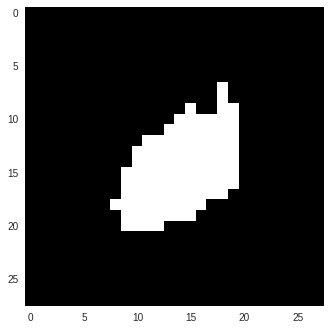

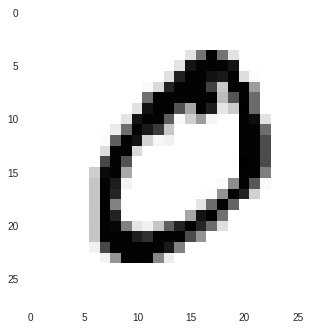

In [28]:
def makeInnerPixels(X):
  nbs = [-29, -1, -28, -27, 1, 29, 28, 27]
  def paintCorners(img):
    # do BW
    img = (img > threshold)
    n = len(img)
    #assume 28 x 28
    paint(0, n, img, nbs)
    paint(n-1, n, img, nbs)
    paint(27, n, img, nbs)
    paint (n-28, n, img, nbs)
    #convert bool to float
    img = img.astype('float32')
    return img
  
  new = np.apply_along_axis(paintCorners, 1, X)
  
  return new
  
plt.imshow(makeInnerPixels(orig_tr_im[0:2])[1].reshape((28,28)))
plt.grid(None)
plt.show()
plt.imshow(train_images_original[1])
plt.grid(None)
plt.show()

### Leftest right and rightest left

In [29]:
def makeLR_n_RL(X):
  nbs = [-29, -1, -28, -27, 1, 29, 28, 27]
  
    
  def calcLR_n_RL(img):
    def findRL(img):
      #fixing paint bug
      img=img.copy()
      img[0:n:28]=True
      #painting
      i = img.copy()
      paint(27, n, i, nbs)
      paint (n-1, n, i, nbs)
      #print(img.reshape((28,28)))
#       plt.imshow(img.reshape((28,28)))
#       plt.grid(None)
#       plt.show()
      # now find the difference
      diff = np.logical_xor(img, i).reshape((28,28))
#       plt.imshow(diff)
#       plt.grid(None)
#       plt.show()
      return np.argmax(diff,axis=1)
    
    # do BW
    img = (img > threshold)
    n = len(img)
    #assume 28 x 28
    #find top and bottom
    i_top=np.argmax(img)
    i_bottom=n-1 - np.argmax(img[::-1])
    #fill gaps on top and bottom
#     print(i_top)
    for i in range(i_top-28, -1, -28):
      img[i]=True
    for i in range(i_bottom+28, n, 28):
      img[i]=True
#     plt.imshow(img.reshape((28,28)))
#     plt.grid(None)
#     plt.show()
    ## find LR and RL
    RL = findRL(img)
    LR = findRL(img[::-1])[::-1]
    return np.concatenate((LR, RL))
  
  new = np.apply_along_axis(calcLR_n_RL, 1, X)
  
  return new / max(np.max(new), 1)

makeLR_n_RL(orig_tr_im[0:2])

array([[0.43478261, 0.43478261, 0.43478261, 0.43478261, 0.43478261,
        0.43478261, 0.73913043, 0.86956522, 0.86956522, 0.73913043,
        0.73913043, 0.69565217, 0.69565217, 0.65217391, 0.60869565,
        0.56521739, 0.47826087, 0.47826087, 0.52173913, 0.60869565,
        0.69565217, 0.7826087 , 0.91304348, 1.        , 1.        ,
        0.86956522, 0.86956522, 0.86956522, 0.82608696, 0.82608696,
        0.82608696, 0.82608696, 0.82608696, 0.82608696, 1.        ,
        0.7826087 , 0.7826087 , 0.60869565, 0.56521739, 0.60869565,
        0.60869565, 0.69565217, 0.73913043, 0.7826087 , 0.86956522,
        0.86956522, 0.86956522, 0.86956522, 0.7826087 , 0.69565217,
        0.60869565, 0.52173913, 0.39130435, 0.39130435, 0.39130435,
        0.39130435],
       [0.52173913, 0.52173913, 0.52173913, 0.52173913, 0.52173913,
        0.56521739, 0.60869565, 0.65217391, 0.73913043, 0.73913043,
        0.7826087 , 0.82608696, 0.86956522, 0.86956522, 0.91304348,
        0.91304348, 0.91304

### Calculate with new features

In [0]:
extra_features = makeInnerPixels(orig_tst_im)

In [0]:
test_images=np.c_[extra_features, test_images]

In [0]:
extra_features = makeLR_n_RL(orig_tst_im)

In [0]:
test_images=np.c_[extra_features, test_images]

In [0]:
extra_features = makeInnerPixels(orig_tr_im)

In [0]:
train_images=np.c_[extra_features, train_images]

In [0]:
extra_features = makeLR_n_RL(orig_tr_im)

In [0]:
train_images=np.c_[extra_features, train_images]

In [38]:
network = models.Sequential()
network.add(layers.Dense(10, activation='softmax', input_shape=(train_images.shape[1],)))
network.summary()
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                16290     
Total params: 16,290
Trainable params: 16,290
Non-trainable params: 0
_________________________________________________________________


In [39]:
epochs = 50
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 37us/step - loss: 1.1304 - acc: 0.7386 - val_loss: 0.6787 - val_acc: 0.8449
Epoch 2/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.5899 - acc: 0.8625 - val_loss: 0.5006 - val_acc: 0.8806
Epoch 3/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.4798 - acc: 0.8813 - val_loss: 0.4295 - val_acc: 0.8935
Epoch 4/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.4273 - acc: 0.8912 - val_loss: 0.3948 - val_acc: 0.8928
Epoch 5/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.3940 - acc: 0.8977 - val_loss: 0.3680 - val_acc: 0.9080
Epoch 6/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.3713 - acc: 0.9021 - val_loss: 0.3477 - val_acc: 0.9094
Epoch 7/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.3551 - acc: 0.9041 - val_loss: 0.3354 - val_acc

## Display the training/test loss/accuracy

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

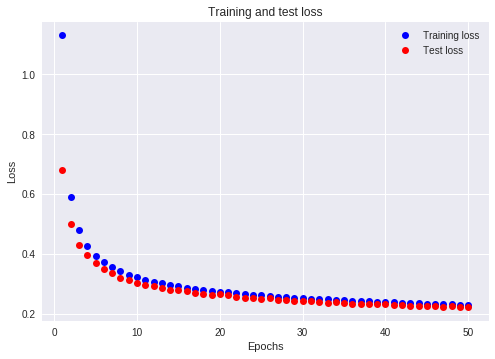

In [41]:
import matplotlib.pyplot as plt

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

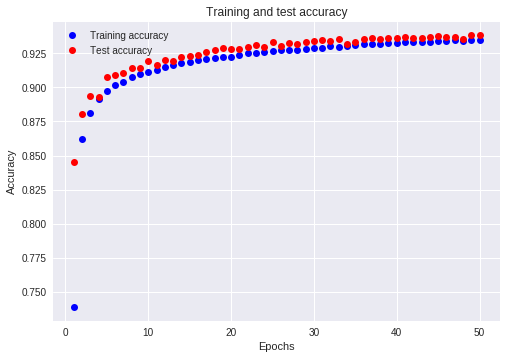

In [43]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Results of adding "inner pixels" features

Additional improvement was attained, although not much.
However, the number of features nearly doubled.

## Results of adding "leftest right and rightest left"

Although the number of additional features was less that for "inner pixels" (28*2 vs 28^2), the improvement was larger